In [3]:
# 구글 드라이브에 있는 파일 가져오기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_test_data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


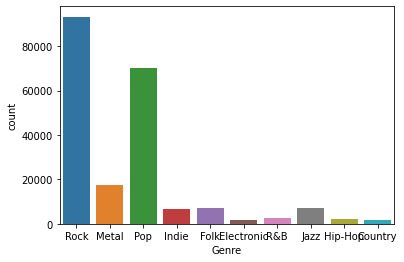

In [5]:
import seaborn as sns
sns.countplot(train['Genre'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


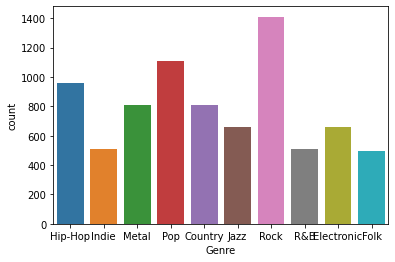

In [6]:
import seaborn as sns
sns.countplot(test['Genre'])

In [7]:
import numpy as np
# X_train, y_train 형태로 만들기
# X_train
X_train = []
for lyric in train['Lyrics']:
  words = lyric.split()
  X_train.append(words)

# y_train
y_train = np.array(train['Genre'])

# X_test
X_test = []
for lyric in test['Lyrics']:
  words = lyric.split()
  X_test.append(words)

# y_test
y_test = np.array(test['Genre'])

In [8]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print('단어집합의 크기: ', len(tokenizer.word_index))

단어집합의 크기:  169470


In [9]:
# 등장 빈도수가 THRESHOLD 미만인 단어가 얼만큼의 비중을 차지하는지 확인
def GetRareWordRatio(vocab, threshold):
  total_cnt = len(vocab.word_index)
  rare_cnt = 0
  total_freq = 0
  rare_freq = 0

  for key, value in vocab.word_counts.items():
    total_freq += value
    if (value < threshold):
      rare_cnt += 1
      rare_freq += value
  
  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 미만인 희귀 단어의 수: %s'%(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [10]:
# threshold = 30 확인
GetRareWordRatio(tokenizer, 30)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 30번 미만인 희귀 단어의 수: 147593
단어 집합에서 희귀 단어의 비율: 87.09093054817963
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.065518512762085


In [11]:
vocab_size = 169470 - 147593 + 2
print('vocab_size: ', vocab_size)

vocab_size:  21879


In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)

In [13]:
X_train = tokenizer.texts_to_sequences(X_train)

In [14]:
for v in X_train[:5]:
  print(v)

[8, 948, 31, 265, 2400, 99, 364, 10654, 99, 4, 1367, 1439, 37, 52, 21, 763, 7, 3203, 2800, 16, 90, 6, 370, 3, 489, 32, 30, 7, 904, 3763, 2, 25, 11, 167, 607, 60, 458, 5, 23, 3103, 2, 25, 11, 167, 4, 102, 21, 23, 1285, 77, 180, 3, 44, 79, 6, 39, 180, 8, 275, 145, 1612, 501, 31, 7, 4604, 13, 132, 90, 33, 386, 15, 102, 41, 19, 162, 13, 91, 26, 22, 3735, 99, 364, 6790, 466, 15, 114, 824, 19, 20, 266, 23, 754, 35, 82, 83, 13, 7, 102, 27, 283, 60, 3, 3291, 91, 10, 4, 725, 7, 504, 15, 53, 2913, 99, 3, 674, 2540, 96, 10, 5, 618, 6, 91, 180, 8, 275, 22, 50, 7, 1834, 24, 16, 3336, 67, 3, 37, 90, 2, 25, 11, 167, 607, 60, 458, 5, 23, 3103, 2, 25, 11, 167, 4, 102, 21, 11, 23, 1285, 77, 180, 3, 44, 79, 6, 39, 180, 8, 275, 145, 1612, 501, 31, 7, 4604, 13, 132, 90, 33, 386, 15, 102, 41, 19, 162, 13, 91, 26, 22, 3735, 99, 364, 2269, 114, 230, 24, 37, 448, 19, 20, 266, 23, 754, 35, 82, 83, 13, 7, 102, 27, 283, 13, 7, 102, 27, 283, 50, 10, 7, 3336, 187, 3, 14, 552, 5, 1018, 8, 10, 7, 222, 3, 44, 39, 3, 2

In [15]:
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
for v in X_test[:5]:
  print(v)

[596, 1317, 633, 211, 262, 9260, 15, 1838, 7090, 12, 360, 82, 2, 56, 87, 79, 75, 4, 653, 1784, 810, 743, 2, 561, 39, 2, 58, 969, 18, 12, 225, 6, 1312, 236, 37, 10598, 2, 17, 478, 400, 109, 6, 2, 42, 12, 3041, 747, 6, 1, 12, 2060, 10, 987, 411, 5, 49, 338, 2, 41, 7, 117, 1, 24, 2134, 1618, 29, 4652, 35, 79, 22, 77, 2, 633, 12, 53, 6, 2, 56, 13198, 7, 9255, 2, 172, 4, 877, 434, 111, 1264, 542, 1701, 15, 457, 18, 4, 2472, 29, 113, 39, 8, 10, 47, 13, 4, 324, 421, 4, 434, 22, 148, 13, 1573, 14, 360, 4589, 5, 4, 1020, 22, 1049, 13, 1046, 1683, 5, 11747, 14, 12234, 115, 11, 23, 240, 73, 35, 22, 4, 596, 1879, 1114, 15, 4, 17336, 179, 24, 223, 2261, 5, 2417, 211, 19702, 807, 4, 877, 434, 4, 291, 173, 2, 316, 5, 41, 6, 35, 456, 22, 472, 2563, 2, 863, 4, 2472, 4, 14673, 6, 195, 7362, 5, 112, 7, 2472, 68, 484, 4101, 20, 3, 85, 5, 41, 22, 542, 7, 3009, 31, 111, 6001, 7082, 46, 4, 2472, 10, 20, 12200, 34, 31, 1, 3, 85, 5, 107, 4, 2472, 21, 11, 564, 6, 14, 10, 33, 6095, 4, 430, 5, 6675, 48, 342, 1, 1

In [17]:
# y 정수 인코딩
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

y_train = np.array(y_train_encoded)

# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

y_test = np.array(y_test_encoded)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


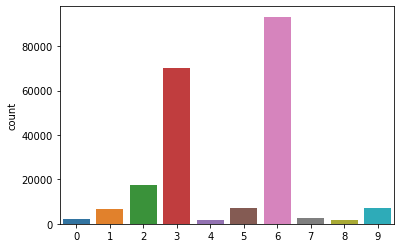

In [18]:
import seaborn as sns
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


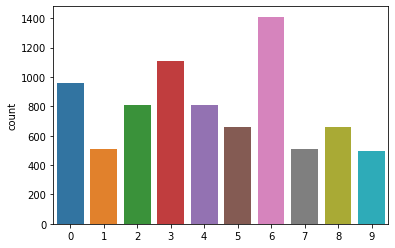

In [19]:
sns.countplot(y_test)

max length :  3410
average length :  258.1935653428775


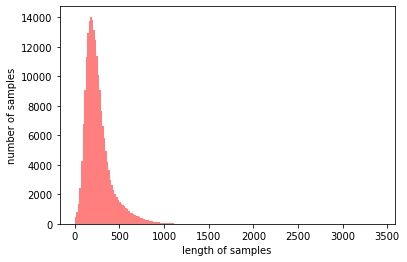

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# 길이 분포 확인
print('max length : ', max(len(i) for i in X_train))
print('average length : ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max length :  2404
average length :  257.43103883005546


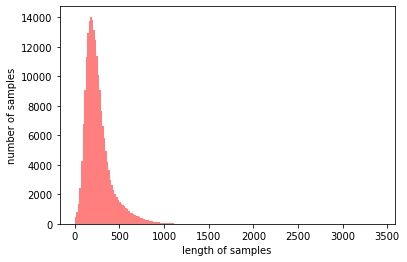

In [21]:
# 길이 분포 확인
print('max length : ', max(len(i) for i in X_test))
print('average length : ', sum(map(len, X_test))/len(X_test))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
# 전체 샘플 중 길이가 max_len이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [23]:
below_threshold_len(500, X_train)
below_threshold_len(500, X_test)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 92.59149531951087
전체 샘플 중 길이가 500 이하인 샘플의 비율: 91.4649520927887


In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
FIX_LEN = 500
X_train = pad_sequences(X_train, FIX_LEN)
X_test = pad_sequences(X_test, FIX_LEN)

In [25]:
for v in X_train[:5]:
  print(v)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     8   948
    31   265  2400    99   364 10654    99     4  1

In [36]:
for v in X_test[:5]:
  print(v)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0   596  1317   633   211   262
  9260    15  1838  7090    12   360    82     2    56    87    79    75
     4   653  1784   810   743     2   561    39     2    58   969    18
    12   225     6  1312   236    37 10598     2    17   478   400   109
     6     2    42    12  3041   747     6     1    12  2060    10   987
   411     5    49   338     2    41     7   117     1    24  2134  1618
    29  4652    35    79    22    77     2   633    12    53     6     2
    56 13198     7  9255     2   172     4   877   434   111  1264   542
  1701    15   457    18     4  2472    29   113   

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [27]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    input_length=FIX_LEN,
                    output_dim=128,
                    mask_zero=True))
model.add(LSTM(128))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          2800512   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 2,933,386
Trainable params: 2,933,386
Non-trainable params: 0
_________________________________________________________________


In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(209273, 500)
(209273,)
(7932, 500)
(7932,)


In [29]:
model_checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5',
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            save_best_only=True
)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=1000,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
168/168 [==============================] - ETA: 0s - loss: 1.3086 - accuracy: 0.4877
Epoch 00001: val_accuracy improved from -inf to 0.38077, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5
168/168 [==============================] - 313s 2s/step - loss: 1.3086 - accuracy: 0.4877 - val_loss: 2.3947 - val_accuracy: 0.3808
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 1.1758 - accuracy: 0.5502
Epoch 00002: val_accuracy improved from 0.38077 to 0.39087, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5
168/168 [==============================] - 308s 2s/step - loss: 1.1758 - accuracy: 0.5502 - val_loss: 2.3184 - val_accuracy: 0.3909
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 1.1092 - accuracy: 0.5843
Epoch 00003: val_accuracy improved from 0.39087 to 0.42975, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_mode

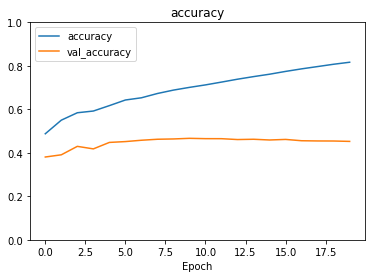

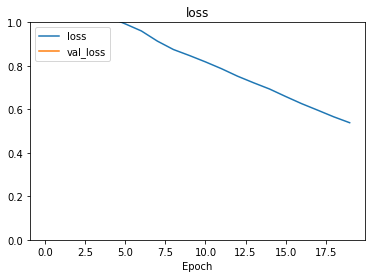

In [30]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [36]:
# 테스트 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5')
loaded_model.evaluate(X_test, y_test, verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 4s 298ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.00      0.00      0.00       510
           2       0.58      0.59      0.58       810
           3       0.22      0.44      0.30      1110
           4       0.00      0.00      0.00       810
           5       0.58      0.26      0.36       659
           6       0.24      0.77      0.36      1410
           7       0.00      0.00      0.00       509
           8       0.00      0.00      0.00       659
           9       0.26      0.04      0.06       495

    accuracy                           0.28      7932
   macro avg       0.19      0.21      0.17      7932
weighted avg       0.20      0.28      0.20      7932



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


```
{
  'Hip-Hop': 0,
  'Indie': 1,
  'Metal': 2,
  'Pop': 3,
  'Country': 4,
  'Jazz': 5,
  'Rock': 6,
  'R&B': 7,
  'Electronic': 8,
  'Folk': 9
}
```

In [38]:
# 학습 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5')
loaded_model.evaluate(X_train[:10000], y_train[:10000], verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_train[:10000], batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_train[:10000], y_pred_bool))

10/10 [==============================] - 4s 299ms/step
              precision    recall  f1-score   support

           1       0.67      0.24      0.35        25
           2       0.75      0.65      0.69      1359
           3       0.49      0.38      0.43      1824
           5       0.00      0.00      0.00         0
           6       0.81      0.87      0.84      6792
           9       0.00      0.00      0.00         0

    accuracy                           0.75     10000
   macro avg       0.45      0.36      0.39     10000
weighted avg       0.74      0.75      0.74     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# 학습 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5')
loaded_model.evaluate(X_train[190000:], y_train[190000:], verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_train[190000:], batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_train[190000:], y_pred_bool))

20/20 [==============================] - 7s 294ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2068
           1       0.11      0.00      0.00      1236
           2       0.59      0.56      0.58      2091
           3       0.31      0.52      0.39      3518
           4       0.00      0.00      0.00      1594
           5       0.42      0.20      0.28      1139
           6       0.27      0.76      0.40      3782
           7       0.00      0.00      0.00      1103
           8       0.00      0.00      0.00      1414
           9       0.39      0.05      0.09      1328

    accuracy                           0.32     19273
   macro avg       0.21      0.21      0.17     19273
weighted avg       0.23      0.32      0.23     19273



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# drop out 넣고 다시

In [40]:
from keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    input_length=FIX_LEN,
                    output_dim=128,
                    mask_zero=True))
model.add(LSTM(128, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          2800512   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,933,386
Trainable params: 2,933,386
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_with_dropout.h5',
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            save_best_only=True
)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=1000,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
168/168 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.4751
Epoch 00001: val_accuracy improved from -inf to 0.36476, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_with_dropout.h5
168/168 [==============================] - 313s 2s/step - loss: 1.3868 - accuracy: 0.4751 - val_loss: 2.1735 - val_accuracy: 0.3648
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 1.1949 - accuracy: 0.5724
Epoch 00002: val_accuracy improved from 0.36476 to 0.43013, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_with_dropout.h5
168/168 [==============================] - 309s 2s/step - loss: 1.1949 - accuracy: 0.5724 - val_loss: 2.2577 - val_accuracy: 0.4301
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 1.1302 - accuracy: 0.6024
Epoch 00003: val_accuracy did not improve from 0.43013
168/168 [==============================] - 306s 2s/step - loss: 1.

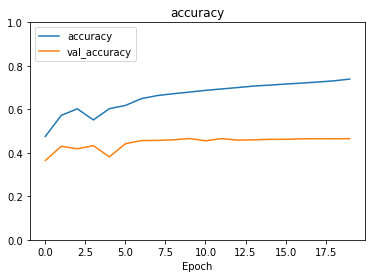

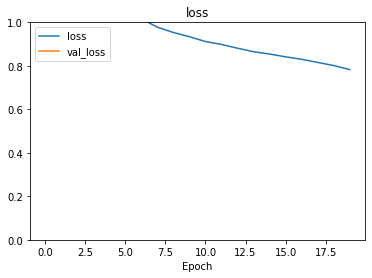

In [42]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [43]:
# 테스트 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5')
loaded_model.evaluate(X_test, y_test, verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 4s 299ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.00      0.00      0.00       510
           2       0.58      0.59      0.58       810
           3       0.22      0.44      0.30      1110
           4       0.00      0.00      0.00       810
           5       0.58      0.26      0.36       659
           6       0.24      0.77      0.36      1410
           7       0.00      0.00      0.00       509
           8       0.00      0.00      0.00       659
           9       0.26      0.04      0.06       495

    accuracy                           0.28      7932
   macro avg       0.19      0.21      0.17      7932
weighted avg       0.20      0.28      0.20      7932



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# 학습 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model.h5')
loaded_model.evaluate(X_train[190000:], y_train[190000:], verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_train[190000:], batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_train[190000:], y_pred_bool))

20/20 [==============================] - 7s 295ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2068
           1       0.11      0.00      0.00      1236
           2       0.59      0.56      0.58      2091
           3       0.31      0.52      0.39      3518
           4       0.00      0.00      0.00      1594
           5       0.42      0.20      0.28      1139
           6       0.27      0.76      0.40      3782
           7       0.00      0.00      0.00      1103
           8       0.00      0.00      0.00      1414
           9       0.39      0.05      0.09      1328

    accuracy                           0.32     19273
   macro avg       0.21      0.21      0.17     19273
weighted avg       0.23      0.32      0.23     19273



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
